## **Maximum Posterior Estimation**

---

### **Introduction**
MLE(Maximum Likelihood Estimation) alone poses a high risk of overfitting due to the `Zero-Count Problem`

To address this issue, we can use prior knowledge and apply Bayes' theorm to mitigate overfitting.

But the result of this approach can vary depending on the prior knowledge used.

---

### **Situation**
You threw a coin 5 times, and it landed on heads all 5 times.

In this scenario, using MLE, the probability of coin landing on heads is 100%

But this result does not make sense, based on our prior knowledge, the probability of coin landing on heads is 50%, and this can be considered as overfitting.

So, We will use **MAP(Maximum Posterior Estimation)** as shown below.
$$
\hat{\theta}_{MAP} = \underset{\theta}{\text{argmax}} \ \left[ \log P(D \mid \theta) + \log P(\theta) \right]\
$$

Beta distribution will be used to represent prior knowledge.

---


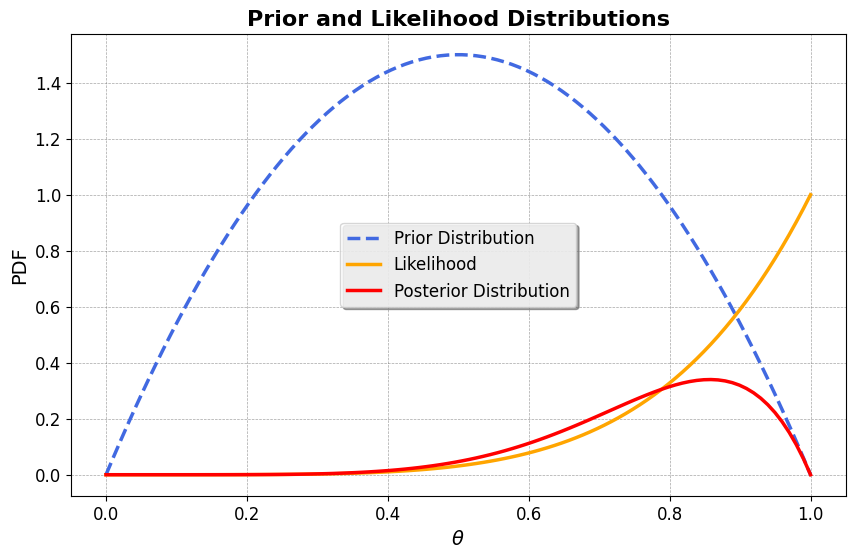

In [31]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Probability of coin landing on heads
theta = np.linspace(0, 1, 100)

# Prior Distribution
# alpha and beta param is prior knowledge.
alpha = 2
beta_param = 2
prior_distribution = beta.pdf(theta, alpha, beta_param)

# Likelihood
likelihood = (theta**5) * (1-theta)**0

# Posterior Distribution
posterior_distribution = prior_distribution * likelihood

plt.figure(figsize=(10, 6))
plt.plot(theta, prior_distribution, label='Prior Distribution', color='royalblue', linewidth=2.5, linestyle='--')
plt.plot(theta, likelihood, label='Likelihood', color='orange', linewidth=2.5, linestyle='-')
plt.plot(theta, posterior_distribution, label = 'Posterior Distribution', color = 'red', linewidth = 2.5)
plt.title('Prior and Likelihood Distributions', fontsize=16, fontweight='bold')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, shadow=True, fancybox=True, framealpha=0.8)
plt.show()

In [37]:
theta_max_idx_in_MAE = np.argmax(posterior_distribution)
theta_max_idx_in_MLE = np.argmax(likelihood)

theta_max_in_MAE = theta[theta_max_idx_in_MAE]
theta_max_in_MLE = theta[theta_max_idx_in_MLE]

print(f'Optimal theta using MLE: {theta_max_in_MLE}')
print(f'Optimal theta using MAE: {theta_max_in_MAE}')

Optimal theta using MLE: 1.0
Optimal theta using MAE: 0.8585858585858587


---

### **Conclusion**

Using MLE, the optimal theta is 100%, which doesn't make sense and can be considered overfitting to the training data.

On the other hand, the optimal theta using MAE is 86%. While this also seems unrealistic, it is more plausible than 100%, can therefore be considered less overfitting.

---
